In [2]:
import pandas as pd
import numpy as np

In [5]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [4]:
train_data.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,UI_9185,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,UI_449,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,UI_9014,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,UI_14987,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,UI_25532,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1


In [6]:
print(train_data.shape)
print(test_data.shape)


(19536, 12)
(6512, 11)


In [7]:
train_data.isnull().sum()#no null values

UserID                               0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

In [8]:
train_data.dtypes

UserID                                object
realtionship_status                   object
industry                              object
genre                                 object
targeted_sex                          object
average_runtime(minutes_per_week)      int64
airtime                               object
airlocation                           object
ratings                              float64
expensive                             object
money_back_guarantee                  object
netgain                                int64
dtype: object

In [9]:
df=train_data.drop(columns='UserID')
df_test=test_data.drop(columns='UserID')

In [10]:
cat_cols=[col for col in df.columns if df[col].dtype=='O']


In [11]:
cat_cols

['realtionship_status',
 'industry',
 'genre',
 'targeted_sex',
 'airtime',
 'airlocation',
 'expensive',
 'money_back_guarantee']

In [12]:
num_cols=[col for col in df.columns if col not in cat_cols]

In [13]:
num_cols

['average_runtime(minutes_per_week)', 'ratings', 'netgain']

In [14]:
num_cols_test=['average_runtime(minutes_per_week)','ratings']

In [15]:
df.netgain.value_counts()

0    14886
1     4650
Name: netgain, dtype: int64

In [16]:
df.netgain.value_counts()*100/df.shape[0]#Might be imbalanced datasset

0    76.197789
1    23.802211
Name: netgain, dtype: float64

In [17]:
def no_categories(df,col_list):
    for col in col_list:
        print("{} have {} categories\n".format(col,df[col].nunique()))
    
    

In [18]:
no_categories(df,cat_cols)

realtionship_status have 7 categories

industry have 6 categories

genre have 5 categories

targeted_sex have 2 categories

airtime have 3 categories

airlocation have 42 categories

expensive have 3 categories

money_back_guarantee have 2 categories



In [19]:
no_categories(df_test,cat_cols)

realtionship_status have 7 categories

industry have 6 categories

genre have 5 categories

targeted_sex have 2 categories

airtime have 3 categories

airlocation have 41 categories

expensive have 3 categories

money_back_guarantee have 2 categories



In [ ]:
df.corr()

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
#from datetime import datetime as dt
import time, warnings
warnings.filterwarnings("ignore")
%matplotlib inline

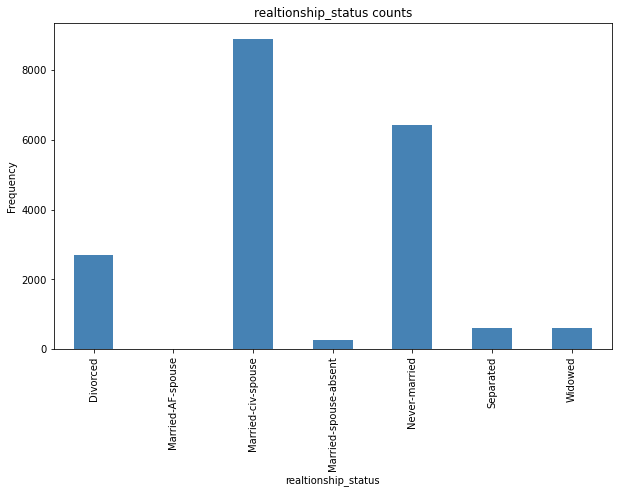

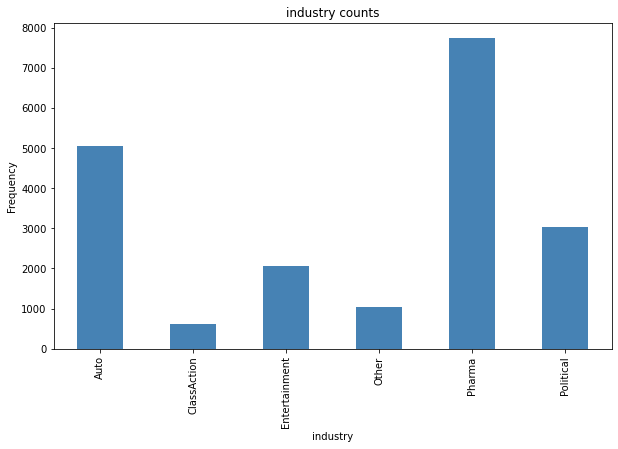

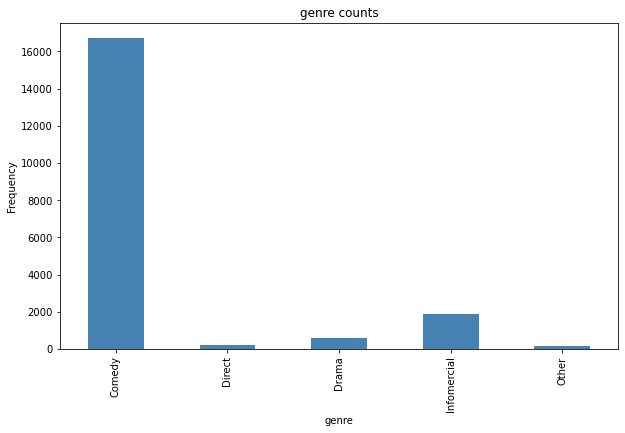

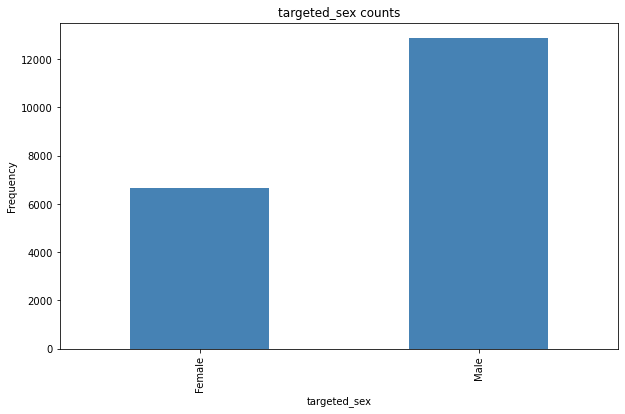

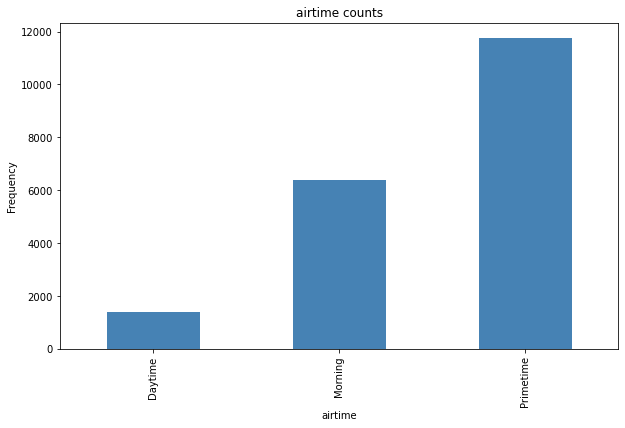

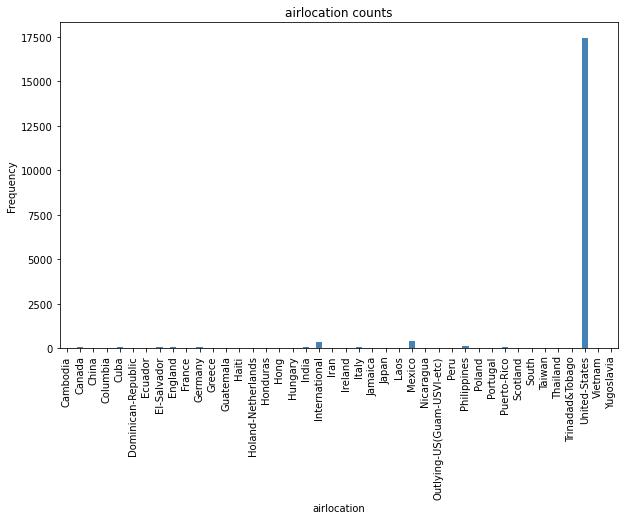

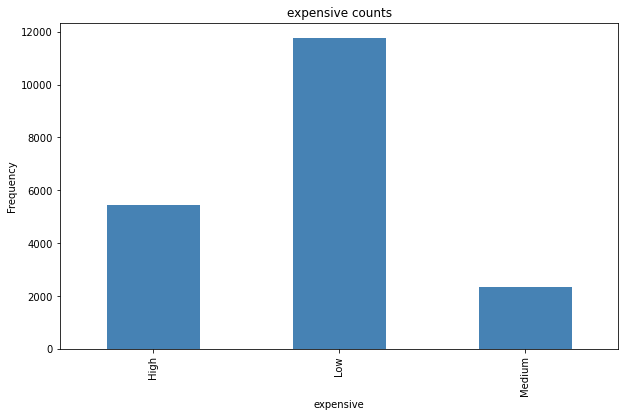

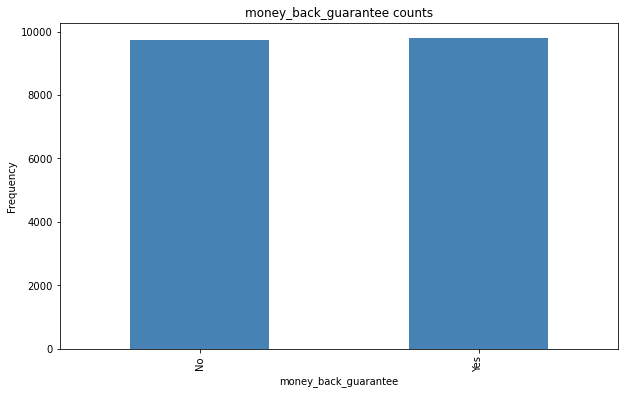

In [21]:
for col in cat_cols:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [22]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt
    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,8))

    # Plot the histogram   
    ax[0].hist(var_data,alpha=0.5,bins=10)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(f'Data Distribution')

    # Show the figure
    fig.show()

Distribtion for average_runtime(minutes_per_week)

Skewness:  0.31438720202762793
                                                                                                    
Minimum:1.00
Mean:40.38
Median:40.00
Mode:40.00
Maximum:99.00



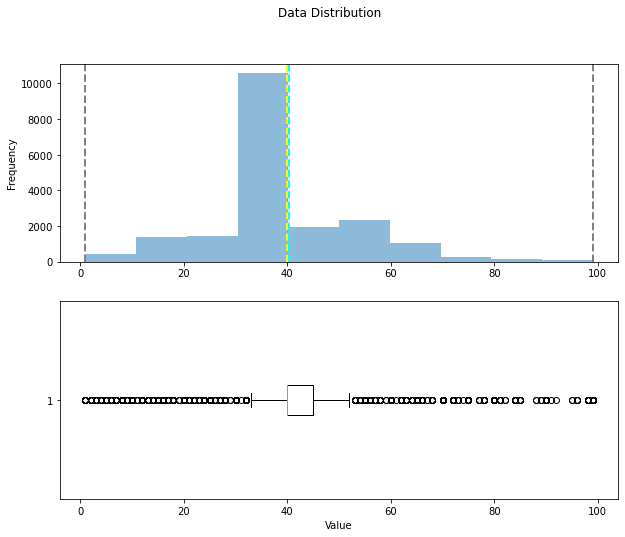

In [23]:
col1 = df['average_runtime(minutes_per_week)']
print(f'Distribtion for average_runtime(minutes_per_week)')
print('\nSkewness: ',df['average_runtime(minutes_per_week)'].skew())
print(' '*100)
show_distribution(col1)

Distribtion for ratings

Skewness:  11.305354425798908
                                                                                                    
Minimum:0.00
Mean:0.04
Median:0.03
Mode:0.03
Maximum:1.00



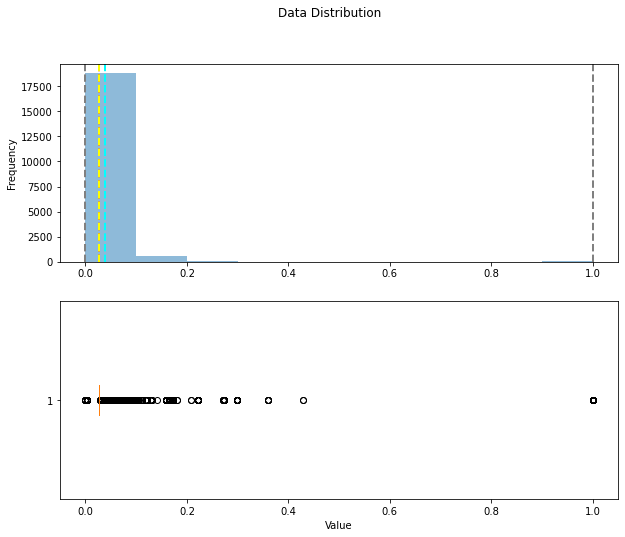

In [24]:
col1 = df['ratings']
print(f'Distribtion for ratings')
print('\nSkewness: ',df.ratings.skew())
print(' '*100)
show_distribution(col1)

In [ ]:
cat_cols

In [25]:
ordinal_cat_cols=['expensive']

In [26]:
nominal_cat_cols=[col for col in cat_cols if col not in ordinal_cat_cols]

In [24]:
nominal_cat_cols

['realtionship_status',
 'industry',
 'genre',
 'targeted_sex',
 'airtime',
 'airlocation',
 'money_back_guarantee']

In [27]:
relation=pd.get_dummies(df['realtionship_status'], prefix='relation', prefix_sep='_',drop_first=True)
industry=pd.get_dummies(df['industry'], prefix='industry', prefix_sep='_',drop_first=True)
genre=pd.get_dummies(df['genre'], prefix='genre', prefix_sep='_',drop_first=True)
sex=pd.get_dummies(df['targeted_sex'], prefix='sex', prefix_sep='_',drop_first=True)
airtime=pd.get_dummies(df['airtime'], prefix='time', prefix_sep='_',drop_first=True)
airlocation=pd.get_dummies(df['airlocation'], prefix='loc', prefix_sep='_',drop_first=True)

In [28]:
guarante={'Yes':1,'No':0}
df['money_back']=df.money_back_guarantee.map(guarante)

In [29]:
relation_test=pd.get_dummies(df_test['realtionship_status'], prefix='relation', prefix_sep='_',drop_first=True)
industry_test=pd.get_dummies(df_test['industry'], prefix='industry', prefix_sep='_',drop_first=True)
genre_test=pd.get_dummies(df_test['genre'], prefix='genre', prefix_sep='_',drop_first=True)
sex_test=pd.get_dummies(df_test['targeted_sex'], prefix='sex', prefix_sep='_',drop_first=True)
airlocation_test=pd.get_dummies(df_test['airlocation'], prefix='loc', prefix_sep='_',drop_first=True)
airtime_test=pd.get_dummies(df_test['airtime'], prefix='time', prefix_sep='_',drop_first=True)

#guarante={'Yes':1,'No':0}
df_test['money_back']=df_test.money_back_guarantee.map(guarante)

In [30]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Low','Medium','High']])

df['expensive_oe'] = oe.fit_transform(np.array(df['expensive']).reshape(-1,1))

In [31]:
df_test['expensive_oe'] = oe.transform(np.array(df_test['expensive']).reshape(-1,1))

In [32]:
df1=pd.concat([df[num_cols],relation,industry,genre,sex,airlocation,airtime,df['money_back'],df['expensive_oe']],axis=1)
df1.head()

,average_runtime(minutes_per_week),ratings,netgain,relation_Married-AF-spouse,relation_Married-civ-spouse,relation_Married-spouse-absent,relation_Never-married,relation_Separated,relation_Widowed,industry_ClassAction,...,loc_Taiwan,loc_Thailand,loc_Trinadad&Tobago,loc_United-States,loc_Vietnam,loc_Yugoslavia,time_Morning,time_Primetime,money_back,expensive_oe
0,40,0.027465,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1.0
1,35,0.027465,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.0
2,40,0.027465,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0.0
3,40,0.027465,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0.0
4,50,0.027465,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0.0


In [33]:
df1_test=pd.concat([df_test[num_cols_test],relation_test,industry_test,genre_test,sex_test,airlocation_test,airtime_test,df_test['money_back'],df_test['expensive_oe']],axis=1)
df1_test.head()

,average_runtime(minutes_per_week),ratings,relation_Married-AF-spouse,relation_Married-civ-spouse,relation_Married-spouse-absent,relation_Never-married,relation_Separated,relation_Widowed,industry_ClassAction,industry_Entertainment,...,loc_South,loc_Taiwan,loc_Thailand,loc_United-States,loc_Vietnam,loc_Yugoslavia,time_Morning,time_Primetime,money_back,expensive_oe
0,40,0.027465,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,1,2.0
1,40,0.027465,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0.0
2,40,0.027465,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,2.0
3,30,0.027465,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,2.0
4,70,0.027465,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0.0


In [34]:
df1.shape

(19536, 64)

In [35]:
df1_test.shape

(6512, 62)

In [36]:
final_train, final_test = df1.align(df1_test, join='inner', axis=1)  # inner join 

In [37]:
final_train.shape

(19536, 62)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score,classification_report,confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [39]:
X=final_train
y=df1.netgain

In [40]:
from sklearn.preprocessing import StandardScaler
std_sc=StandardScaler()
X_std=std_sc.fit_transform(X) 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=3)

In [42]:
# Applying SMOTE
from imblearn.over_sampling import SMOTE 

print("Shape of train dataset before applying SMOTE:",X_train.shape)

X_sm_train, y_sm_train = SMOTE().fit_resample(X_train,y_train)

print("Shape of train dataset after applying SMOTE:",X_sm_train.shape)

Shape of train dataset before applying SMOTE: (13675, 62)
Shape of train dataset after applying SMOTE: (20782, 62)


In [43]:
y_train.value_counts()

0    10391
1     3284
Name: netgain, dtype: int64

In [44]:
y_sm_train.value_counts()

1    10391
0    10391
Name: netgain, dtype: int64

In [45]:
# Initialising AdaBoostClassifier model
ada_model = AdaBoostClassifier(random_state=0)

#Fitting the model on train data
ada_model.fit(X_sm_train,y_sm_train)

#Making prediction on test data
y_pred = ada_model.predict(X_test)

#Finding the f1 score
ada_score = f1_score(y_test,y_pred)
print("f1_score: ",ada_score)

#Finding the confusion matrix
ada_cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n', ada_cm)

#Finding the classification report
ada_cr=classification_report(y_test,y_pred)
print('Classification report: \n', ada_cr)

f1_score:  0.6184468741239136
Confusion matrix: 
 [[3397 1098]
 [ 263 1103]]
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.76      0.83      4495
           1       0.50      0.81      0.62      1366

    accuracy                           0.77      5861
   macro avg       0.71      0.78      0.73      5861
weighted avg       0.83      0.77      0.78      5861



In [46]:

#Initializing the model
xgb_model = XGBClassifier(random_state=0)

#Fitting the model on train data
xgb_model.fit(X_sm_train,y_sm_train)

#Making prediction on test data
y_pred = xgb_model.predict(X_test)

#Finding the f1 score
xgb_score = f1_score(y_test,y_pred)
print("f1: ",xgb_score)

#Finding the confusion matrix
xgb_cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n', xgb_cm)

#Finding the classification report
xgb_cr=classification_report(y_test,y_pred)
print('Classification report: \n', xgb_cr)

[09:53:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1:  0.6069127123608671
Confusion matrix: 
 [[3483 1012]
 [ 330 1036]]
Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.77      0.84      4495
           1       0.51      0.76      0.61      1366

    accuracy                           0.77      5861
   macro avg       0.71      0.77      0.72      5861
weighted avg       0.82      0.77      0.78      5861



In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=12)
#Fitting the model on train data
rfc.fit(X_sm_train,y_sm_train)

#Making prediction on test data
y_pred = rfc.predict(X_test)

#Finding the f1 score
rf_score = f1_score(y_test,y_pred)
print("f1: ",rf_score)

#Finding the confusion matrix
rf_cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n', rf_cm)

#Finding the classification report
rf_cr=classification_report(y_test,y_pred)
print('Classification report: \n', rf_cr)

f1:  0.5825755353476092
Confusion matrix: 
 [[3445 1050]
 [ 373  993]]
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      4495
           1       0.49      0.73      0.58      1366

    accuracy                           0.76      5861
   macro avg       0.69      0.75      0.71      5861
weighted avg       0.81      0.76      0.77      5861



In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)

#Finding the f1 score
rf_score = f1_score(y_test,y_pred1)
print("f1: ",rf_score)

#Finding the confusion matrix
rf_cm=confusion_matrix(y_test,y_pred1)
print('Confusion matrix: \n', rf_cm)

f1:  0.4698175011698643
Confusion matrix: 
 [[4226  269]
 [ 864  502]]


In [50]:
lr2 = LogisticRegression()
lr2.fit(X_sm_train,y_sm_train)
y_pred1 = lr2.predict(X_test)

#Finding the f1 score
rf_score = f1_score(y_test,y_pred1)
print("f1: ",rf_score)

#Finding the confusion matrix
rf_cm=confusion_matrix(y_test,y_pred1)
print('Confusion matrix: \n', rf_cm)

f1:  0.6111111111111112
Confusion matrix: 
 [[3286 1209]
 [ 233 1133]]
